In [14]:
from pandas import read_csv
from numpy import dstack
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from tensorflow.keras.layers import TimeDistributed,MaxPooling1D,Conv1D,Flatten,Dropout,ConvLSTM2D
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import load_model

In [2]:
%store -r X_train
%store -r X_val
%store -r X_test
%store -r y_train
%store -r y_val
%store -r y_test


In [3]:
trainX=X_train
trainy=y_train
valX=X_val
valy=y_val
testX=X_test
testy=y_test

In [13]:
testX.shape

(11, 100, 17)

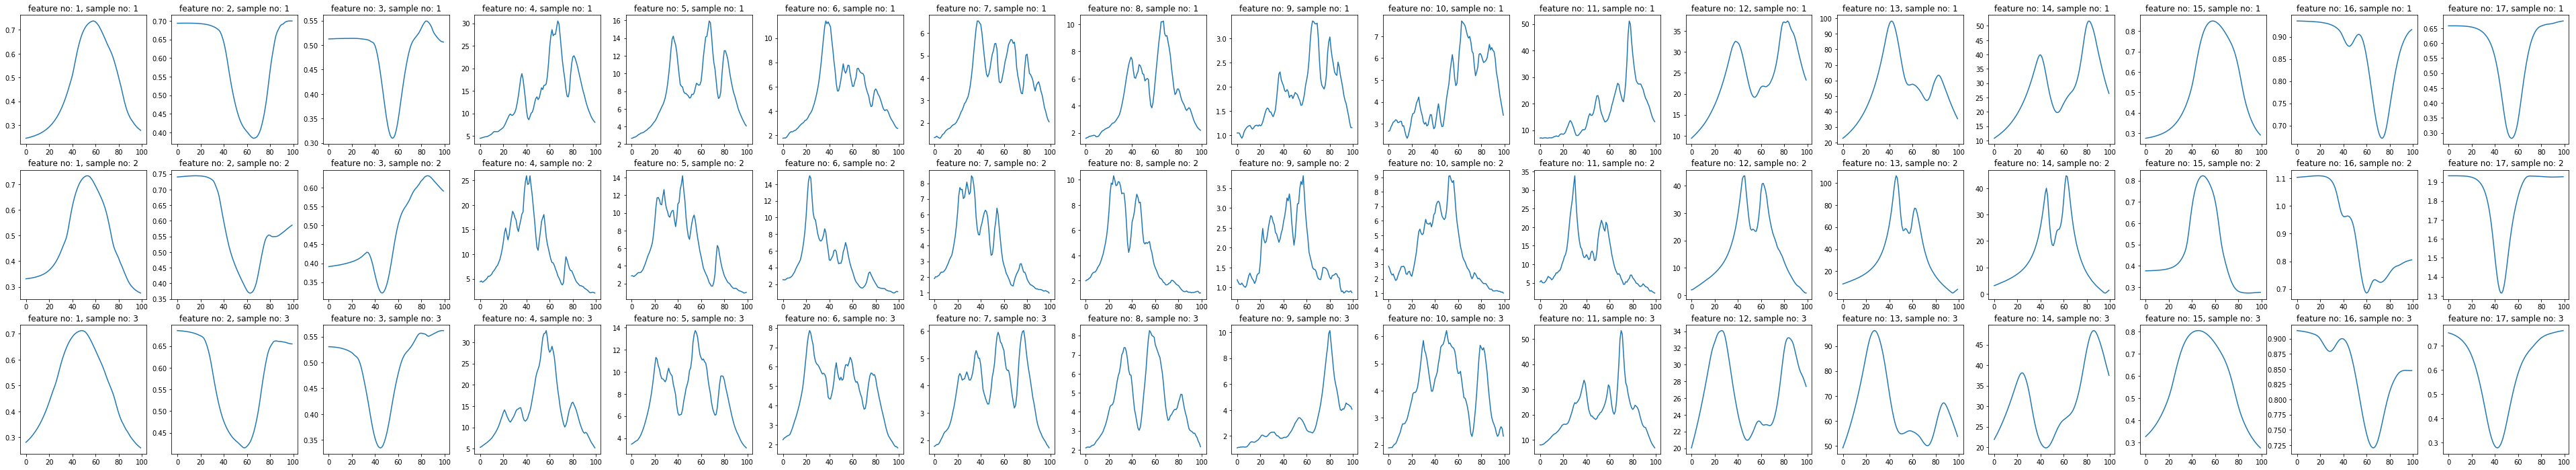

In [44]:
features=17
samples=3
movement_num=1

trainX_movement=np.array([trainX[i] for i in range(len(trainX)) if trainy[i][movement_num]==1])

m=features
n=samples
fig=plt.figure(figsize=(4*m,4*n))
k=0
for i in range(1,n+1):
    for j in range(1,m+1):
        k=k+1
        fig.add_subplot(n,m,k)
        plt.plot(trainX_movement[i-1,:,j-1])
        plt.title('feature no: %d, sample no: %d'%(j,i))
plt.show()

In [4]:
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]

In [5]:
trainX.shape

(47, 100, 17)

In [27]:
# fit and evaluate a model 
def evaluate_model(trainX, trainy,valX,valy, testX, testy): 
	# define model
	verbose, epochs, batch_size = 1, 100, 64
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	# reshape data into time steps of sub-sequences
	n_steps, n_length = 4, 25 # n_timesteps = n_steps * n_length
	trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
	valX = valX.reshape((valX.shape[0], n_steps, n_length, n_features))
	testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
	# define model
	model = Sequential()
	model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
	model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
	model.add(TimeDistributed(Dropout(0.5)))
	model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
	model.add(TimeDistributed(Flatten()))
	model.add(LSTM(100))
	model.add(Dropout(0.3))
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	history=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose,validation_data=(valX,valy))
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return history,accuracy,model


In [28]:
history,accuracy,model=evaluate_model(trainX, trainy,valX,valy, testX, testy)
print('test_acc :',accuracy)


Train on 47 samples, validate on 10 samples
Epoch 1/100
47/47 [==============================] - 1s 27ms/sample - loss: 1.6670 - acc: 0.0851 - val_loss: 1.6543 - val_acc: 0.1000
Epoch 2/100
47/47 [==============================] - 0s 721us/sample - loss: 1.6188 - acc: 0.1915 - val_loss: 1.6765 - val_acc: 0.1000
Epoch 3/100
47/47 [==============================] - 0s 658us/sample - loss: 1.5926 - acc: 0.1489 - val_loss: 1.6483 - val_acc: 0.1000
Epoch 4/100
47/47 [==============================] - 0s 678us/sample - loss: 1.5337 - acc: 0.3617 - val_loss: 1.6466 - val_acc: 0.1000
Epoch 5/100
47/47 [==============================] - 0s 637us/sample - loss: 1.5516 - acc: 0.2979 - val_loss: 1.6690 - val_acc: 0.1000
Epoch 6/100
47/47 [==============================] - 0s 658us/sample - loss: 1.5907 - acc: 0.2979 - val_loss: 1.6408 - val_acc: 0.1000
Epoch 7/100
47/47 [==============================] - 0s 658us/sample - loss: 1.5809 - acc: 0.2766 - val_loss: 1.5806 - val_acc: 0.3000
Epoch 8/100


In [30]:
model=load_model('E:/ML_projects/myoband/with_CLEANED_2/models/conv_lstm_highest.h5')

In [29]:
model.save('models\conv_lstm_highest.h5')

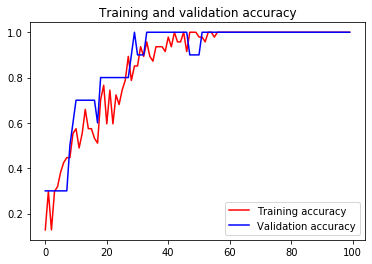

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
fig=plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
fig.savefig('models\conv_lstm_train=1.0000_val=1.0000,test=1.0.png')


plt.show()